In [5]:
%pylab inline 
%matplotlib notebook
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sympy import *

Populating the interactive namespace from numpy and matplotlib


C:\Users\JVelez\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['array', 'zeros', 'Line2D', 'maximum', 'Polygon', 'sinh', 'gamma', 'add', 'sin', 'conjugate', 'exp', 'gcd', 'sign', 'vectorize', 'floor', 'flatten', 'take', 'reshape', 'beta', 'sqrt', 'fft', 'pi', 'trunc', 'mod', 'trace', 're', 'log', 'power', 'Circle', 'interactive', 'tanh', 'diag', 'det', 'plot', 'roots', 'minimum', 'poly', 'transpose', 'multinomial', 'var', 'prod', 'source', 'invert', 'binomial', 'ifft', 'seterr', 'Number', 'cosh', 'nan', 'product', 'diff', 'sinc', 'test', 'plotting', 'eye', 'solve', 'ones', 'tan', 'partition', 'cos', 'lcm', 'cbrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Se deducirá la ecuación para calcular la distancia entre 2 puntos en un plano 2D
* El primer punto será la ubicación de la fuente
* El segndo punto será la ubicación de un punto en el espacio que puede verse afectado por la fuente

dst = $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

### Generación / Carga de la data

In [23]:
def calcular_distancia(X,Y,XF,YF):
    return np.round(np.sqrt(np.power(XF-X,2)+np.power(YF-Y,2)),2)


XF = 5
YF = 12.5
X = np.arange(1, 11, 1).reshape(5,2)

rng = check_random_state(0)

# Entrenamiento
X_train = np.round(rng.uniform(1, 11, 10000).reshape(5000, 2),2)
XFs=[[XF] for i in range(5000)]
YFs=[[YF] for i in range(5000)]
X_train=np.append(X_train, XFs, axis=1)
X_train=np.append(X_train, YFs, axis=1)
y_train = calcular_distancia(X_train[:, 0],X_train[:, 1],XF,YF)

# Testing
X_test = np.round(rng.uniform(1, 11, 10000).reshape(5000, 2),2)
X_test=np.append(X_test, XFs, axis=1)
X_test=np.append(X_test, YFs, axis=1)
y_test = calcular_distancia(X_test[:, 0],X_test[:, 1],XF,YF)


### Se configura el regresor simbólico

In [8]:
est_gp = SymbolicRegressor(population_size=10000, 
                           generations=100, stopping_criteria=0.01, 
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05,  
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)


### Se busca el modelo

In [9]:
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.60      4.31824e+07        5         0.671528         0.631441     47.67m
   1     9.97          264.467        9         0.584092          0.61152     29.52m
   2     8.75          499.797       25         0.507857          0.51803     28.88m
   3     6.35          18.1697       11          0.49913         0.488104     28.24m
   4     6.28          27.7287       17          0.48868         0.500286     24.33m
   5     6.40          342.004       13         0.485425         0.530812     25.16m
   6     7.31          476.203       13          0.40818         0.406998     25.13m
   7     7.42          21.9343       13         0.406451         0.422558     24.69m
   8     7.30           320.78       13          0.34791          0.36896  

  94    15.02          6.89777       15         0.315284         0.373324      1.75m
  95    14.95          17.6274       15         0.315683         0.369736      1.42m
  96    14.92          106.149       15          0.31613         0.365714      1.03m
  97    14.90          470.167       15         0.315607          0.37042     42.23s
  98    14.90          23.6988       15         0.315363         0.372613     21.72s
  99    14.81          7.38794       15          0.31564         0.367487      0.00s


SymbolicRegressor(generations=100, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=10000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

### Imprimir la solución

In [10]:
print(est_gp._program)

add(sub(X3, X1), div(mul(0.864, X0), mul(div(X3, X1), sub(X3, X0))))


### Se visualiza

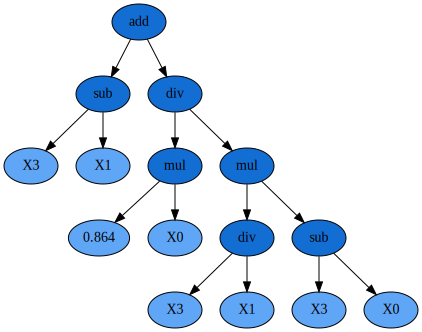

In [11]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [12]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}

In [13]:
next_e = sympify(str(est_gp._program), locals=converter)
next_e

0.864*X0*X1/(X3*(-X0 + X3)) - X1 + X3

In [18]:
score_gp1 = est_gp.score(X_train, y_train)
print('R2 (Entrenamiento):', score_gp1)
score_gp2 = est_gp.score(X_test, y_test)
print('R2: (Pruebas):', score_gp2)

R2 (Entrenamiento): 0.9707900793644232
R2: (Pruebas): 0.9690969221918436


In [ ]:
y_gp = est_gp.predict(X_test)
score_gp = est_gp.score(X_test, y_test)
print('R2: (Predicción):', score_gp)